In [1]:
# 모듈 호출
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import LSTM
from keras.layers import Conv1D, MaxPooling1D
from keras.datasets import imdb

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
# 시드값 고정
seed=42
np.random.seed(seed)
tf.random.set_seed(seed)

In [5]:
# 데이터 불러오기
(x_train,y_train),(x_test,y_test) = imdb.load_data(num_words=5000)

In [6]:
# 전처리
x_train = sequence.pad_sequences(x_train, maxlen=100)
x_test = sequence.pad_sequences(x_test, maxlen=100)

# 라벨 범주화는 필요없음(이미 1/0, 긍정/부정)

In [7]:
# 모델 구성
model = Sequential()
model.add(Embedding(5000,100))
model.add(Dropout(0.5))
model.add(Conv1D(64,5,padding='valid',strides=1,activation='relu'))
model.add(MaxPooling1D(pool_size=4))
model.add(LSTM(55))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 100)         500000    
                                                                 
 dropout (Dropout)           (None, None, 100)         0         
                                                                 
 conv1d (Conv1D)             (None, None, 64)          32064     
                                                                 
 max_pooling1d (MaxPooling1D  (None, None, 64)         0         
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 55)                26400     
                                                                 
 dense (Dense)               (None, 1)                 56        
                                                        

In [8]:
# 모델 구성 (2) - 마지막층에 활성화함수를 따로 둔 이유가 있나? 확인
model_2 = Sequential()
model_2.add(Embedding(5000,100))
model_2.add(Dropout(0.5))
model_2.add(Conv1D(64,5,padding='valid',strides=1,activation='relu'))
model_2.add(MaxPooling1D(pool_size=4))
model_2.add(LSTM(55))
model_2.add(Dense(1, activation='sigmoid'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 100)         500000    
                                                                 
 dropout_1 (Dropout)         (None, None, 100)         0         
                                                                 
 conv1d_1 (Conv1D)           (None, None, 64)          32064     
                                                                 
 max_pooling1d_1 (MaxPooling  (None, None, 64)         0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 55)                26400     
                                                                 
 dense_1 (Dense)             (None, 1)                 56        
                                                      

In [9]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])
model_2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [10]:
# 모델 학습
history = model.fit(x_train, y_train, epochs=5, batch_size=100, validation_data=(x_test,y_test))
history_2 = model_2.fit(x_train, y_train, epochs=5, batch_size=100, validation_data=(x_test,y_test))

Epoch 1/5
250/250 [==============================] - 13s 18ms/step - loss: 0.4588 - acc: 0.7613 - val_loss: 0.3303 - val_acc: 0.8546
Epoch 2/5
250/250 [==============================] - 4s 16ms/step - loss: 0.2893 - acc: 0.8792 - val_loss: 0.3345 - val_acc: 0.8502
Epoch 3/5
250/250 [==============================] - 4s 16ms/step - loss: 0.2441 - acc: 0.9006 - val_loss: 0.3361 - val_acc: 0.8578
Epoch 4/5
250/250 [==============================] - 4s 16ms/step - loss: 0.2092 - acc: 0.9200 - val_loss: 0.3498 - val_acc: 0.8554
Epoch 5/5
250/250 [==============================] - 4s 16ms/step - loss: 0.1753 - acc: 0.9327 - val_loss: 0.3688 - val_acc: 0.8542
Epoch 1/5
250/250 [==============================] - 6s 18ms/step - loss: 0.4566 - acc: 0.7637 - val_loss: 0.3288 - val_acc: 0.8554
Epoch 2/5
250/250 [==============================] - 4s 16ms/step - loss: 0.2890 - acc: 0.8768 - val_loss: 0.3300 - val_acc: 0.8523
Epoch 3/5
250/250 [==============================] - 4s 16ms/step - loss: 0

In [11]:
# 결과 비교
print(f"model's test loss/acc : {model.evaluate(x_test,y_test)}")
print(f"model_2's test loss/acc : {model_2.evaluate(x_test,y_test)}")

# 큰 차이가 없긴한데... 그래도 따로 활성화함수 층을 둔 경우가 조금이나마 나은 지표를 보임

782/782 [==============================] - 6s 6ms/step - loss: 0.3688 - acc: 0.8542
model's test loss/acc : [0.36876600980758667, 0.854200005531311]
782/782 [==============================] - 5s 6ms/step - loss: 0.3937 - acc: 0.8501
model_2's test loss/acc : [0.3937450647354126, 0.8501200079917908]


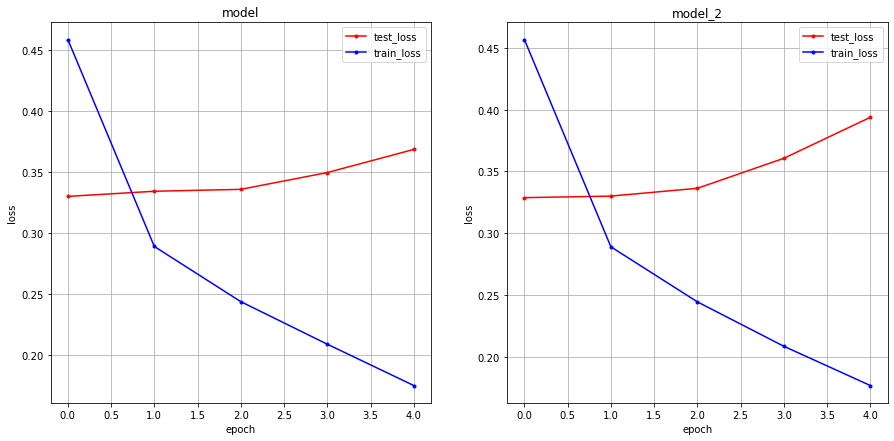

In [20]:
# 지표 시각화

y_vloss = history.history['val_loss']
y_loss = history.history['loss']
y_vloss_2 = history_2.history['val_loss']
y_loss_2 = history_2.history['loss']

x_len = np.arange(len(y_loss))
fig = plt.figure(figsize=(15,7))
ax_1 = plt.subplot(1,2,1)
ax_1.plot(x_len, y_vloss, marker='.', c="r", label='test_loss')
ax_1.plot(x_len, y_loss, marker='.', c="b", label='train_loss')
ax_1.legend(loc=0)
ax_1.grid()
ax_1.set_xlabel('epoch')
ax_1.set_ylabel('loss')
ax_1.set_title('model')

ax_2 = plt.subplot(1,2,2)
ax_2.plot(x_len, y_vloss_2, marker='.', c="r", label='test_loss')
ax_2.plot(x_len, y_loss_2, marker='.', c="b", label='train_loss')
ax_2.legend(loc=0)
ax_2.grid()
ax_2.set_xlabel('epoch')
ax_2.set_ylabel('loss')
ax_2.set_title('model_2')

plt.show()

# 따로 안빼면 뒤에서 테스트 오차가 확오르긴함